In [1]:
import pandas as pd
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

def plot_func(x, y, label, title, xlab, ylab, x1 = None, x2 = None, y1 = None, y2 = None):

    plt.figure(figsize = (20, 10))
    plt.scatter(x, y, label = label )
    plt.title(title, fontsize = 30)
    plt.xlabel(xlab, fontsize = 30)
    plt.ylabel(ylab, fontsize = 30)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.xlim(x1, x2)
    plt.ylim(y1, y2)
    plt.legend(loc = 'best', fontsize = 20)
    plt.grid(True)
    plt.show()
    
def plot_log_fft(t, Y, label, title, xlab, ylab):

    Y = 20*(np.log10(np.abs(Y)) / 0.775)

    plt.figure(figsize = (20, 10))
    plt.plot(t, Y, label = label )
    plt.title(title, fontsize = 30)
    plt.xlabel(xlab, fontsize = 30)
    plt.ylabel(ylab, fontsize = 30)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.legend(loc = 'best', fontsize = 20)
    plt.semilogx()
    plt.grid(True)
    plt.show()

def fft_func(y, f_s):
    
    freqs = fft.fftshift(fft.fftfreq(y.size, 1 / f_s))
    Y = fft.fftshift(fft.fft(y))
    
    return freqs, Y

def phase_func(Y):
    
    phases = np.angle(Y) * 180 / np.pi
    
    return phases

def thresholded_phase_func(Y, threshold):

    Y2 = Y
    Y2[np.abs(Y) < threshold] = 0
    phases2 = np.angle(Y2) * 180 / np.pi
        
    return phases2

In [2]:
hour = '12.14'
day = '29072024'

In [3]:
df = pd.read_csv(f"../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/wf_{hour}_290724_01.csv")
data = df.to_numpy()
print(data[:1])
data = data[1:]
data_float = data.astype(float)
t = data_float[1:, 0]
print(f"Times: {t}")

y = data_float[1:, 1]
print(f"Amplitudes: {y}")

[['(ms)' '(mV)']]
Times: [1.00480000e-03 2.00960000e-03 3.01440000e-03 ... 1.00000707e+02
 1.00001712e+02 1.00002717e+02]
Amplitudes: [-122.0472 -118.1102 -118.1102 ... -118.1102 -118.1102 -114.1732]


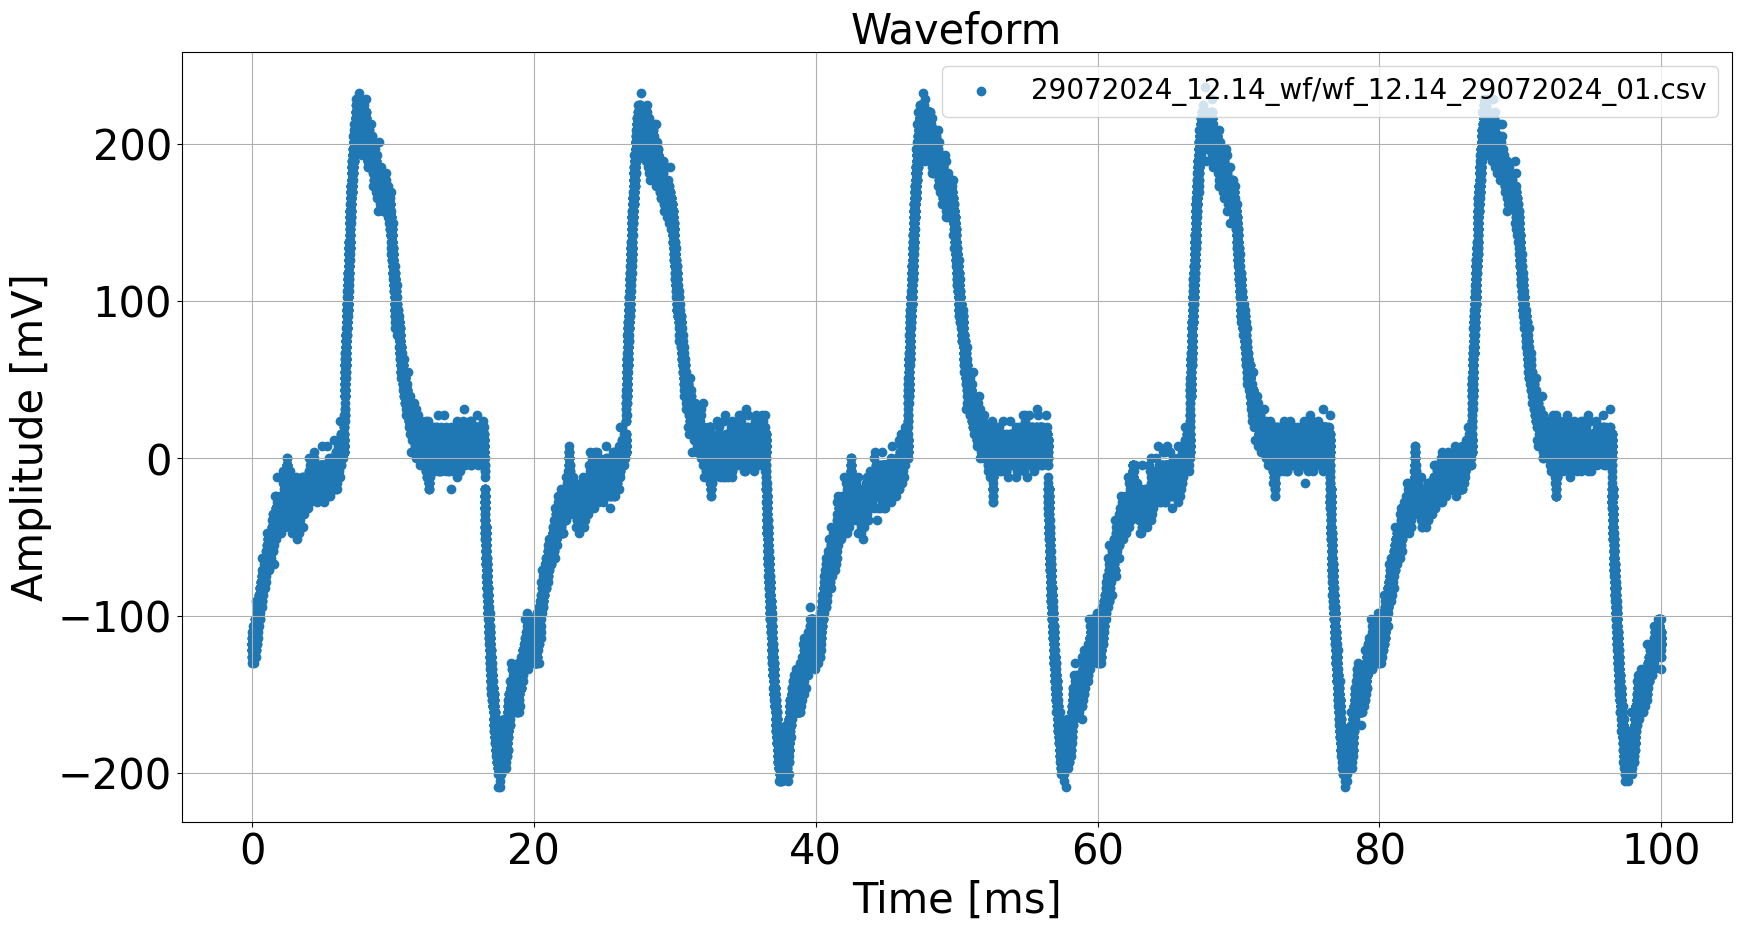

In [4]:
plot_func(t, y, f'{day}_{hour}_wf/wf_{hour}_{day}_01.csv', 'Waveform', 'Time [ms]', 'Amplitude [mV]')

In [5]:
span = t[len(t)-1] 
f_s = len(t) / span
print(f"f_ s = {f_s}")

f_ s = 995.2229601902608


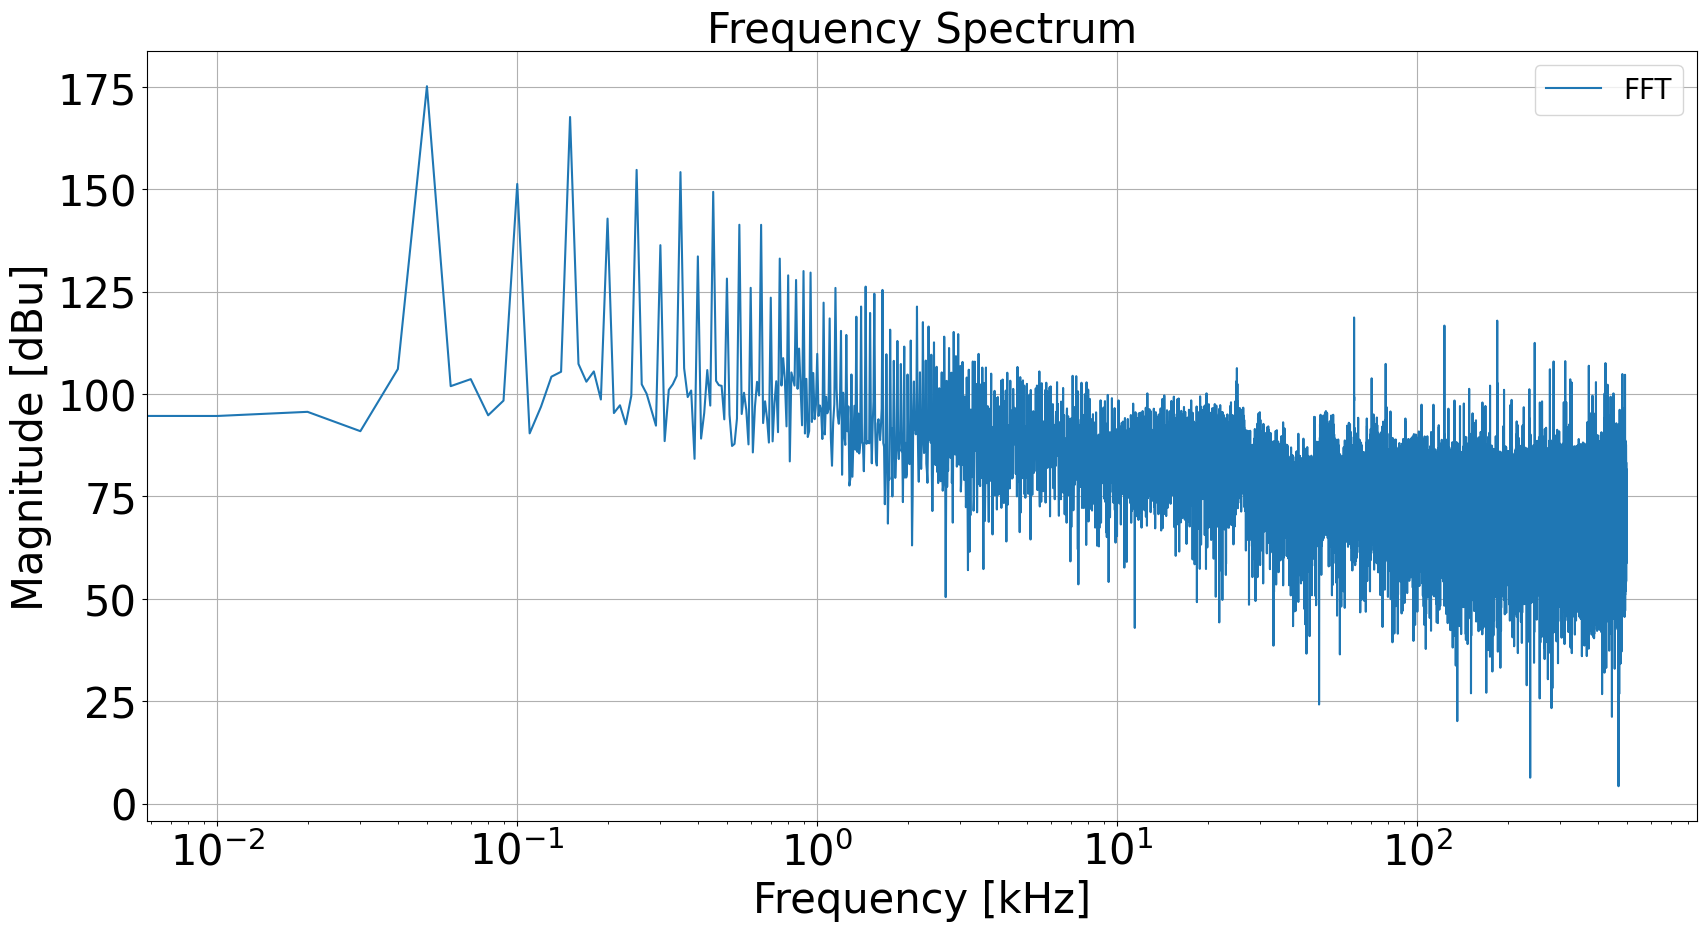

In [6]:
freqs, Y = fft_func(y, f_s)

plot_log_fft(freqs, Y, 'FFT', 'Frequency Spectrum', 'Frequency [kHz]', 'Magnitude [dBu]')

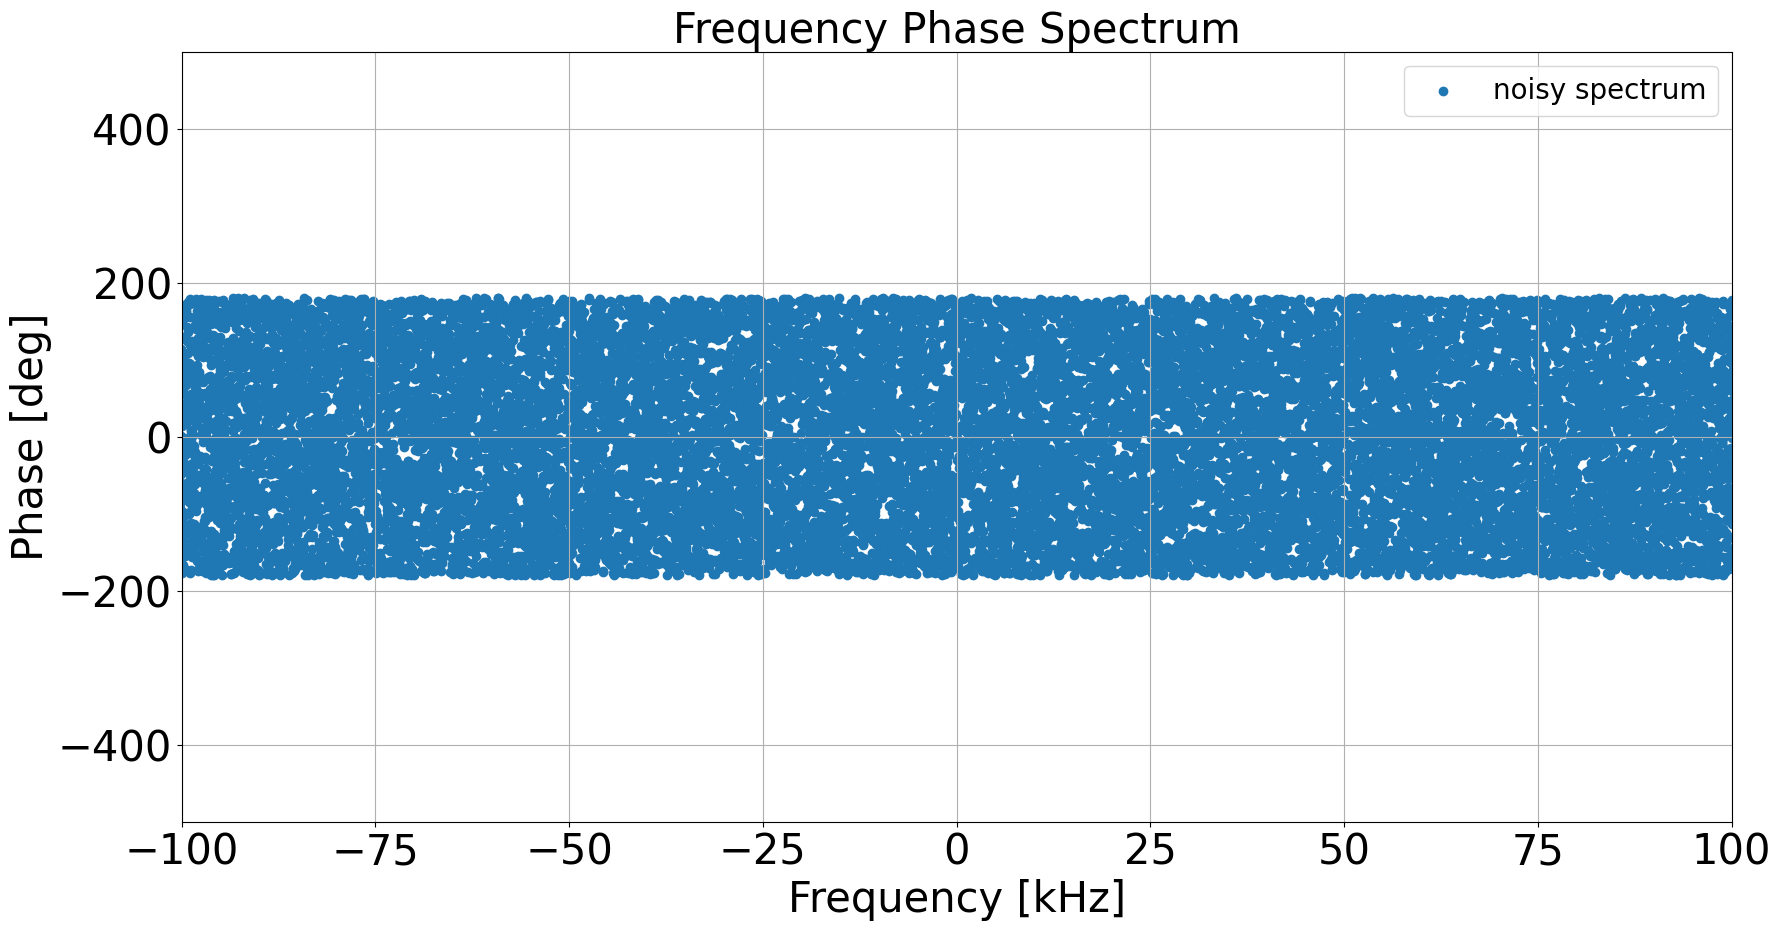

In [7]:
phases = phase_func(Y)

plot_func(freqs, phases, 'noisy spectrum', 'Frequency Phase Spectrum', 'Frequency [kHz]', 'Phase [deg]', -100, +100, -500, +500)

frequency with max magnitude: [-49.99864156  49.99864156] Hz
phase at f: [ 161.23491462 -161.23491462]


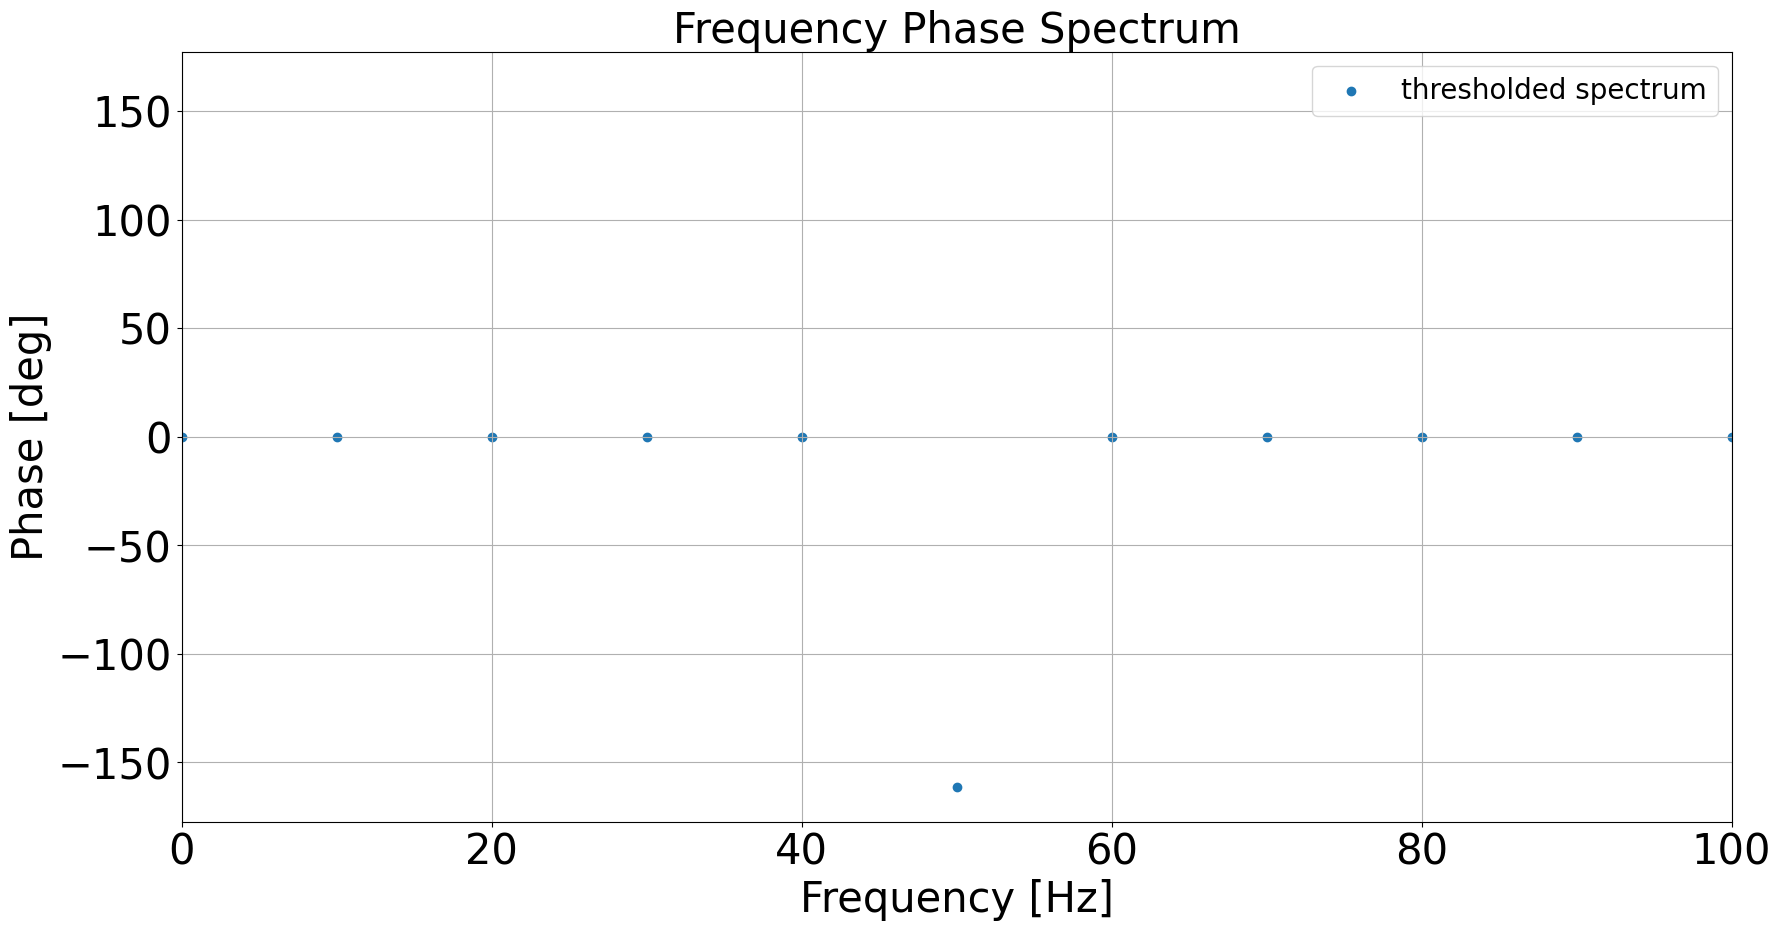

In [8]:
f = freqs[np.abs(Y) == np.max(np.abs(Y))]
print(f"frequency with max magnitude: {f*1000} Hz")
threshold = np.max(np.abs(Y))/1

p = np.angle(Y[np.isin(freqs, f)], deg = True)
print(f"phase at f: {p}")

phases2 = thresholded_phase_func(Y, threshold)
plot_func(freqs*1000, phases2, 'thresholded spectrum', 'Frequency Phase Spectrum', 'Frequency [Hz]', 'Phase [deg]', 0, +100)